In [1]:
import numpy as np
from matplotlib import pyplot as plt

def steps(max):
    steps = 0
    temp = 0
    x = 0
    while temp*x >= 0 and steps < max:
        temp = x
        x += 2*np.random.random()-1
        #x += 2*np.random.uniform()-1
        steps += 1
    return steps

In [26]:
def avgSteps(runs, max):
    sum = 0
    for i in range(runs):
        sum += steps(max)
        if i%10000 == 0:
            print(i)
    return sum/runs

In [62]:
a = avgSteps(100000, 100000)
print(a)

0
732.79726


In [2]:
def distribution(L, runs, max):
    x = np.zeros(L)
    for i in range(runs):
        if i %100000==0:
            print(i)
        temp = steps(max)
        if temp <= L:
            x[temp-1] += 1
    return x

In [3]:
x = distribution(1000, 1000000, 1000)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


alpha =  1.4852622941579223


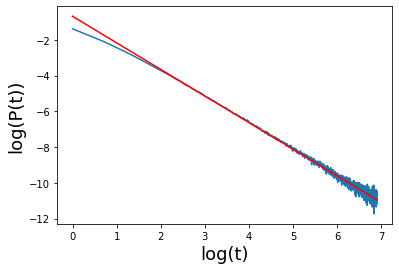

In [4]:
a, b = 1 , 999
y = x[a:b]/1000000
z = np.log(y)

L = b - a
t = np.zeros(L)
for i in range(L):
    t[i]=a+i
u = np.log(t)
A = np.vstack([u, np.ones(len(u))]).T
alpha, beta = np.linalg.lstsq(A, z, rcond=None)[0]
#print(np.linalg.lstsq(A, z, rcond=None)[0])
regx = np.log(np.linspace(a, b, 1000))
regy = alpha*regx + beta
print("alpha = ", -1*alpha)

plt.figure()
plt.plot(u, z)
plt.plot(regx, regy, 'r')
plt.xlabel("log(t)",fontsize=18)
plt.ylabel("log(P(t))",fontsize=18)
plt.show()

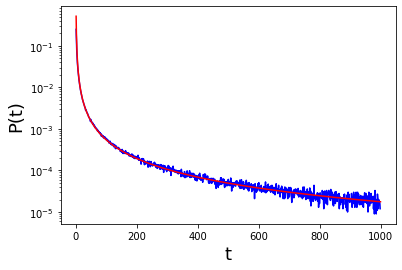

In [57]:
dregx = np.linspace(a, b, L)
#dregy = np.exp(alpha*regx + beta)
dregy = np.exp(beta)*t**alpha

plt.figure()
plt.semilogy(t, y, "b")
plt.semilogy(dregx, dregy, 'r')
#plt.vlines(mArray,-14*10**(-20),0,color="r",lw=0.3, label = "Temperaturendring")
plt.xlabel("t",fontsize=18)
plt.ylabel("P(t)",fontsize=18)
#plt.legend()
plt.show()

In [1]:
f = [1,2,3,4,5,6,7,7,7,7,7,7,7]
print(f[0:10:2])

[1, 3, 5, 7, 7]
